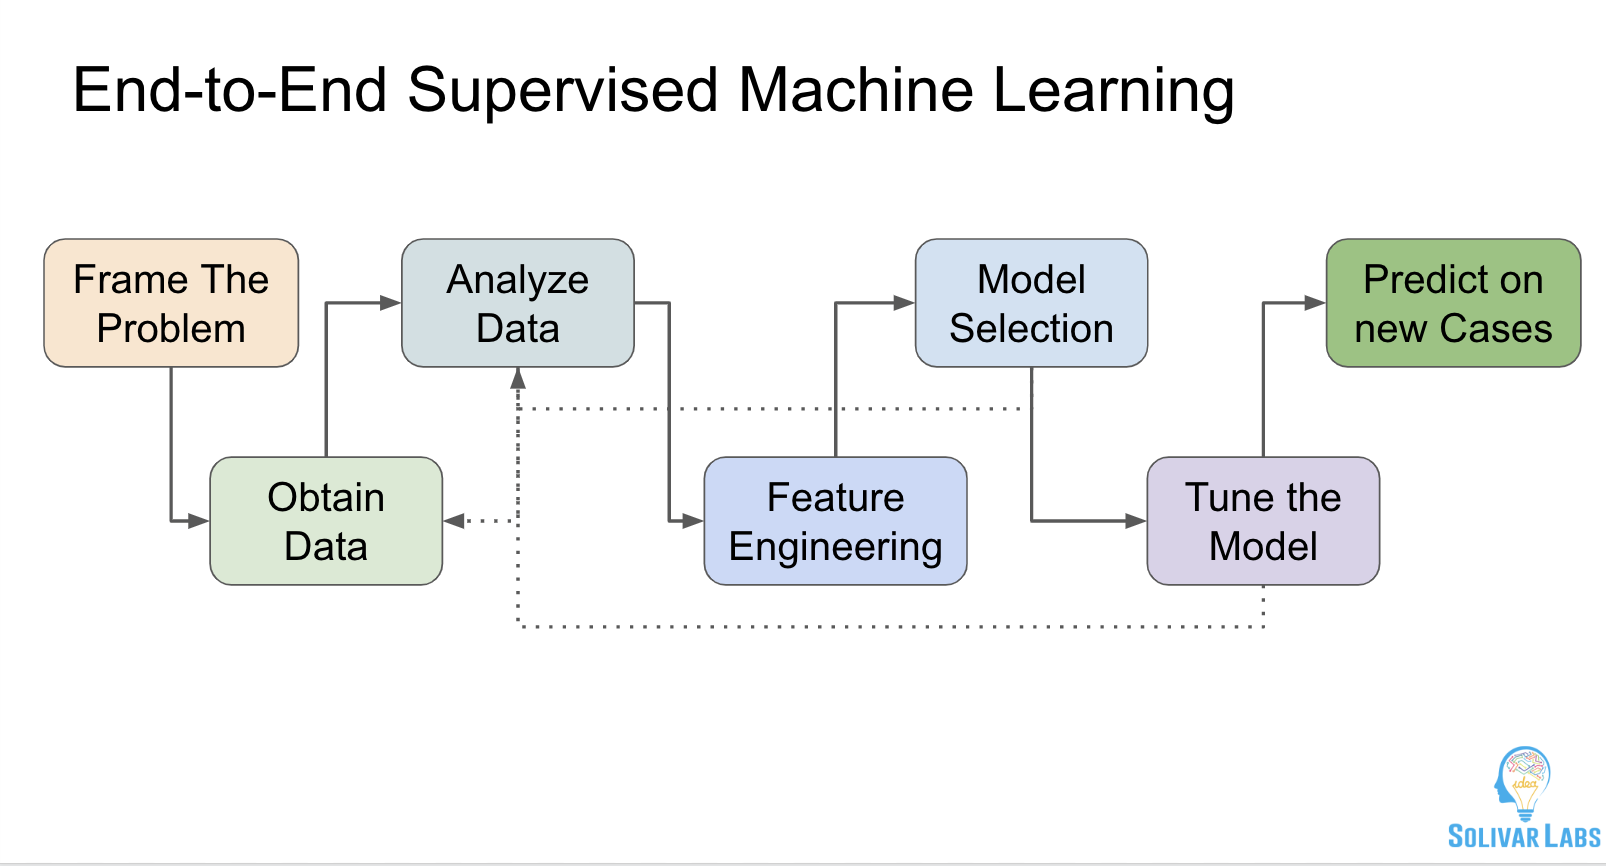

# Step - 1 : Frame The Problem

Build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data.

# Step - 2 : Obtain the Data

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

%matplotlib inline

In [ ]:
!wget -qq https://www.dropbox.com/s/x4lk7tftrij2psh/housing.csv

In [ ]:
housing = pd.read_csv('housing.csv')

In [ ]:
housing.info() #New_parch is added to the set of columns in the data frames

In [ ]:
housing.isnull().sum()

In [ ]:
# Creating a dataframe with 75%
# values of original dataframe
housing_data = housing.sample(frac = 0.80)
 
# Creating dataframe with
# rest of the 25% values
predict_data = housing.drop(housing_data.index)
 

# Step - 3 : Analyse the Data

In [ ]:
housing_data.head()

In [ ]:
housing_data.isnull().sum()

In [ ]:
housing_data.tail()

In [ ]:
housing_data.describe()

In [ ]:
corr = housing_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
corr['median_house_value']

In [ ]:
housing_data['ocean_proximity'].value_counts()

In [ ]:
sns.stripplot(x="ocean_proximity", y="median_house_value", data=housing_data)

In [ ]:
housing = housing_data.copy()

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(housing['longitude'], housing['latitude'])
ax2.scatter(housing['longitude'], housing['latitude'], alpha=0.1)
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Step - 4 : Feature Engineering

## Step 4.1 Missing Values

> Indented block



In [ ]:
ms.matrix(housing_data)


In [ ]:
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].mean(), inplace=True)

In [ ]:
ms.matrix(housing_data)


In [ ]:
import math
housing_data['total_bedrooms'] = list(map(math.ceil,(housing_data['total_bedrooms'])))

## Step 4.2 Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
df = pd.get_dummies(housing_data['ocean_proximity'], drop_first=True)
df.head()

In [ ]:
#concatinating the dataframe with dummy columns of 'ocean_proximity' to housing_data
housing_data = pd.concat([housing_data, df], axis=1)
housing_data.head()

In [ ]:
#Since we have created dummy columns for 'ocean_proximity', we are dropping the column
housing_data.drop('ocean_proximity', inplace=True, axis=1)
housing_data.info()

In [ ]:
housing_data.columns

In [ ]:
housing_data.info()

In [ ]:
housing_data.isnull().sum()

# Step - 5 : Model Selection

## Building a Regression model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 
                  'population', 'households', 'median_income','INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]

y = housing_data['median_house_value']

#Importing the train_test_split from sklearn to split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [ ]:
len(y_test)

In [ ]:
len(y_test)/len(y)

In [ ]:
#Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

#Initializing the model
lm = LinearRegression()

#Fit the data to the algorithm
lm.fit(X_train, y_train)

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
predict =  lm.predict(X_test)
predict[:5]

In [ ]:
y_test[:5]

Let's move on to evaluate our model.

# Step - 6 : Evaluation

In [ ]:
#Generating a Scatter Plot to evaluate the correctness of validation set against the predicted data
y_hat = lm.predict(X_test)
plt.scatter(y_test,y_hat,alpha=0.1)

In [ ]:
from sklearn import metrics
#Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))

#Mean Square Error
print('MSE:', metrics.mean_squared_error(y_test, y_hat))

#Mean Square Root Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

# Step - 7 : Predict on New Cases

In [ ]:
# Predict on saved data set

In [ ]:
predict_data.info()

# Credits



In [ ]:
!ls -alh *.zip

In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

In [ ]:
ls